#Bias and variance

by Linh Van Nguyen <contact@linhvannguyen.com>

as a part of the demonstration galeries for <a href='http://scikit-learn.org/stable/'>sklearn</a> Machine Learning python package.

------------
This note demonstrates the idea of bias and variance, and how to use this idea in model selection

This notebook includes:
- <a href='#part1'>Part 1: Underfitting vs Overfitting</a>

## Part 1: Underfitting vs Overfitting <a id='part1'></a>

Underfitting and Overfitting are two common terms used in ML model selection. It tells how well a ML model fits the training data and also testing data. Together with these two terms, one finds two terms *bias* and *variance* also very often. 

* Underfitting is a ML so simple that cannot capture the underlying trend of the data. This model is told to be *high-bias, low-variance*: it fits not very well the training data, but its performance remains quite the same for testing data.

* Overfitting is a complicated ML models that fits perfectly the training data, including noises. Its performance however is very bad for testing data. This kind of models has *low-bias, high variance* property.

### Example: polynomial fit

We will simulate a noisy and discret 1D cosin signal. We will fit these data using a polinomial of different order.


In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn import cross_validation
np.random.seed(0)

N_train = 30
degrees = [1, 3, 15]

true_fun = lambda X: np.cos(1.5 * np.pi * X)
X_train = np.sort(np.random.rand(N_train))
y_train = true_fun(X_train) + np.random.randn(N_train) * 0.1

X_test = np.linspace(0, 1, 100)

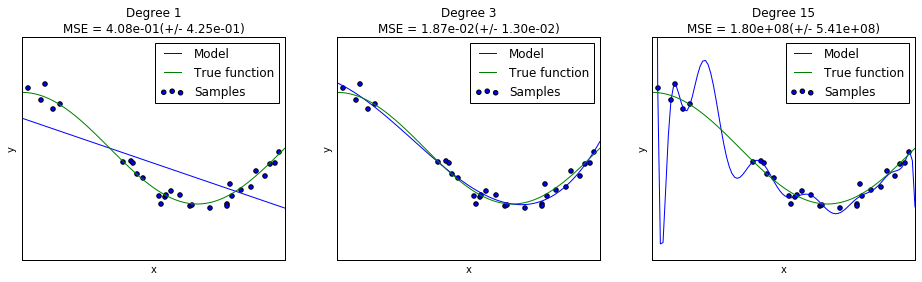

In [4]:
plt.figure(figsize=(16, 4))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features), ("linear_regression", linear_regression)])
    pipeline.fit(X_train[:, np.newaxis], y_train)

    # Evaluate the models using crossvalidation
    scores = cross_validation.cross_val_score(pipeline, X_train[:, np.newaxis], y_train, 
                                              scoring="mean_squared_error", cv=10)

    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X_train, y_train, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(degrees[i], -scores.mean(), scores.std()))
plt.show()